In [1]:
import pickle
import numpy as np
import pandas as pd
import gc


In [4]:
def rotation(data):
    v1_m_h1 = data[:, :, 0] * np.cos(np.pi / 4) - data[:, :, 1] * np.sin(np.pi / 4)  
    v1_p_h1 = data[:, :, 0] * np.cos(np.pi / 4) + data[:, :, 1] * np.sin(np.pi / 4)  
    data[:, :, 0] = v1_m_h1
    data[:, :, 1] = v1_p_h1 
    del v1_m_h1
    del v1_p_h1

    v2_m_h2 = data[:, :, 2] * np.cos(np.pi / 4) - data[:, :, 3] * np.sin(np.pi / 4)
    v2_p_h2 = data[:, :, 2] * np.cos(np.pi / 4) + data[:, :, 3] * np.sin(np.pi / 4)
    data[:, :, 2] = v2_m_h2
    data[:, :, 3] = v2_p_h2 
    del v2_m_h2
    del v2_p_h2
    
    v4_p_h4_30 = data[:, :, 5] * np.cos(np.pi / 4) + data[:, :, 6] * np.sin(np.pi / 4)
    v4_m_h4_30 = data[:, :, 5] * np.cos(np.pi / 4) - data[:, :, 6] * np.sin(np.pi / 4)
    data[:, :, 5] = v4_p_h4_30
    data[:, :, 6] = v4_m_h4_30

    v5_p_h5_30 = data[:, :, 7] * np.cos(np.pi / 6) + data[:, :, 8] * np.sin(np.pi / 6)
    v5_m_h5_30 = data[:, :, 7] * np.cos(np.pi / 6) - data[:, :, 8] * np.sin(np.pi / 6)
    data[:, :, 7] = v5_p_h5_30
    data[:, :, 8] = v5_m_h5_30
    
#     v5_p_h5_30 = data[:, :, -1] * np.cos(np.pi / 4) + data[:, :, -2] * np.sin(np.pi / 4)
#     v5_m_h5_30 = data[:, :, -1] * np.cos(np.pi / 4) - data[:, :, -2] * np.sin(np.pi / 4)
#     data[:, :, -1] = v5_p_h5_30
#     data[:, :, -2] = v5_m_h5_30
    
    del v4_p_h4_30
    del v4_m_h4_30
    del v5_p_h5_30
    del v5_m_h5_30
    
    return data

In [2]:
import os
import random

image_dir = os.listdir('inputs/train/')

In [ ]:
image_sample = np.load(f'inputs/train/{image_dir[random.randrange(len(image_dir))]}')


In [ ]:
image_sample.repeat(2, axis=0).repeat(2, axis=1).shape

In [ ]:
image_sample = np.load(f'inputs/train/{image_dir[random.randrange(len(image_dir))]}')
image_sample = image_sample.repeat(4, axis=0).repeat(4, axis=1)
image_sample.shape

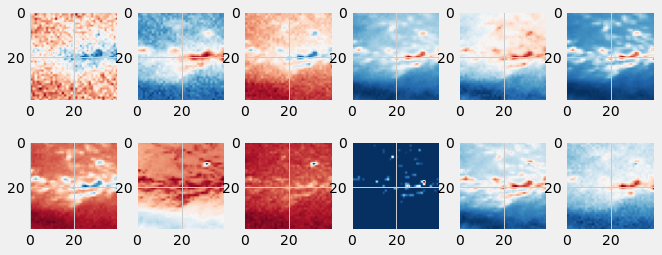

In [31]:
image_sample = np.load(f'inputs/train/{image_dir[random.randrange(len(image_dir))]}')
image_sample_r = rotation(image_sample)

def showimg(img):
    ch15_v = 0
    for i in [0,2,4,5,7]:
        ch15_v += img[:,:,i]
    ch15_h = 0
    for i in [1,3,6,8]:
        ch15_h += img[:,:,i]
    ch15_v = ch15_v.reshape(40,40,1)
    ch15_h = ch15_h.reshape(40,40,1)
    img = np.concatenate([img, ch15_v], -1)
    img = np.concatenate([img, ch15_h], -1)
    return img

image_sample = showimg(image_sample)
image_sample_r = showimg(image_sample_r)

import seaborn as sns
import matplotlib.pyplot as plt

color_map = plt.cm.get_cmap('RdBu')
color_map = color_map.reversed()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(2,6,i+1)
    plt.imshow(image_sample[:, :, i], cmap=color_map)
    

plt.subplot(2,6,10)
plt.imshow(image_sample[:,:,-3], cmap = color_map)

plt.subplot(2,6,11)
plt.imshow(image_sample[:,:,-2], cmap = color_map)

plt.subplot(2,6,12)
plt.imshow(image_sample[:,:,-1], cmap = color_map)

plt.subplots_adjust(top=0.4)
plt.show()
print()
print()



In [ ]:
image_sample = np.load(f'inputs/train/{image_dir[random.randrange(len(image_dir))]}')
image_sample = image_sample.repeat(4, axis=0).repeat(4, axis=1)
image_sample_r = rotation(image_sample)

def showimg(img):
    ch15_v = 0
    for i in [0,2,4,5,7]:
        ch15_v += img[:,:,i]
    ch15_h = 0
    for i in [1,3,6,8]:
        ch15_h += img[:,:,i]
    ch15_v = ch15_v.reshape(160,160,1)
    ch15_h = ch15_h.reshape(160,160,1)
    img = np.concatenate([img, ch15_v], -1)
    img = np.concatenate([img, ch15_h], -1)
    return img

image_sample = showimg(image_sample)
image_sample_r = showimg(image_sample_r)

import seaborn as sns
import matplotlib.pyplot as plt

color_map = plt.cm.get_cmap('RdBu')
color_map = color_map.reversed()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(2,6,i+1)
    plt.imshow(image_sample[:, :, i], cmap=color_map)

plt.subplot(2,6,10)
plt.imshow(image_sample[:,:,-3], cmap = color_map)

plt.subplot(2,6,11)
plt.imshow(image_sample[:,:,-2], cmap = color_map)

plt.subplot(2,6,12)
plt.imshow(image_sample[:,:,-1], cmap = color_map)

plt.show()
print()
print()



In [ ]:
color_map = plt.cm.get_cmap('RdBu')
color_map = color_map.reversed()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(2,6,i+1)
    plt.imshow(image_sample_r[:, :, i], cmap=color_map)

plt.subplot(2,6,10)
plt.imshow(image_sample_r[:,:,-3], cmap = color_map)

plt.subplot(2,6,11)
plt.imshow(image_sample_r[:,:,-2], cmap = color_map)

plt.subplot(2,6,12)
plt.imshow(image_sample_r[:,:,-1], cmap = color_map)

plt.show()
print()
print()

In [ ]:
image_sample = np.load('inputs/train/subset_010477_03.npy')

ch15_v = 0
ch15_v += image_sample[:,:,0]
ch15_v += image_sample[:,:,2]
ch15_v += image_sample[:,:,4]
ch15_v += image_sample[:,:,5]
ch15_v += image_sample[:,:,7]

ch15_h = 0
ch15_h += image_sample[:,:,1]
ch15_h += image_sample[:,:,3]
ch15_h += image_sample[:,:,6]
ch15_h += image_sample[:,:,8]
ch15_v = ch15_v.reshape(40,40,1)
ch15_h = ch15_h.reshape(40,40,1)
image_sample3 = np.concatenate([image_sample, ch15_v], -1)
image_sample3 = np.concatenate([image_sample3, ch15_h], -1)

import seaborn as sns
import matplotlib.pyplot as plt

color_map = plt.cm.get_cmap('RdBu')
color_map = color_map.reversed()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(2,6,i+1)
    plt.imshow(image_sample[:, :, i], cmap=color_map)

plt.subplot(2,6,10)
plt.imshow(image_sample[:,:,-1], cmap = color_map)

plt.subplot(2,6,11)
plt.imshow(image_sample3[:,:,-2], cmap = color_map)

plt.subplot(2,6,12)
plt.imshow(image_sample3[:,:,-1], cmap = color_map)

plt.show()
print()
print()

In [ ]:
image_sample = np.load('inputs/train/subset_010477_03.npy')
ch15_v = 0
ch15_v += image_sample[:,:,0]
ch15_v += image_sample[:,:,2]
ch15_v += image_sample[:,:,4]
ch15_v += image_sample[:,:,5]
ch15_v += image_sample[:,:,7]

ch15_h = 0
ch15_h += image_sample[:,:,1]
ch15_h += image_sample[:,:,3]
ch15_h += image_sample[:,:,6]
ch15_h += image_sample[:,:,8]
ch15_v = ch15_v.reshape(40,40,1)
ch15_h = ch15_h.reshape(40,40,1)
image_sample3 = np.concatenate([image_sample, ch15_v], -1)
image_sample3 = np.concatenate([image_sample3, ch15_h], -1)
image_sample3 = rotation(image_sample3)
import seaborn as sns
import matplotlib.pyplot as plt

color_map = plt.cm.get_cmap('RdBu')
color_map = color_map.reversed()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(2,6,i+1)
    plt.imshow(image_sample[:, :, i], cmap=color_map)

plt.subplot(2,6,10)
plt.imshow(image_sample[:,:,-1], cmap = color_map)

plt.subplot(2,6,11)
plt.imshow(image_sample3[:,:,-2], cmap = color_map)

plt.subplot(2,6,12)
plt.imshow(image_sample3[:,:,-1], cmap = color_map)

plt.show()
print()
print()

In [ ]:
import os
img_dir = os.listdir('inputs/train')

In [ ]:
for i in img_dir[:20]:
    print()
    print()
    image_sample = np.load(f'inputs/train/{i}')
    ch15_v = 0
    ch15_v += image_sample[:,:,0]
    ch15_v += image_sample[:,:,2]
    ch15_v += image_sample[:,:,4]
    ch15_v += image_sample[:,:,5]
    ch15_v += image_sample[:,:,7]
    ch15_h = 0
    ch15_h += image_sample[:,:,1]
    ch15_h += image_sample[:,:,3]
    ch15_h += image_sample[:,:,6]
    ch15_h += image_sample[:,:,8]
    ch15_v = ch15_v.reshape(40,40,1)
    ch15_h = ch15_h.reshape(40,40,1)
    image_sample3 = np.concatenate([image_sample, ch15_v], -1)
    image_sample3 = np.concatenate([image_sample3, ch15_h], -1)

    import seaborn as sns
    import matplotlib.pyplot as plt

    color_map = plt.cm.get_cmap('RdBu')
    color_map = color_map.reversed()
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(10, 10))

    for i in range(9):
        plt.subplot(2,6,i+1)
        plt.imshow(image_sample[:, :, i], cmap=color_map)

    plt.subplot(2,6,10)
    plt.imshow(image_sample[:,:,-1], cmap = color_map)

    plt.subplot(2,6,11)
    plt.imshow(image_sample3[:,:,-2], cmap = color_map)

    plt.subplot(2,6,12)
    plt.imshow(image_sample3[:,:,-1], cmap = color_map)

    plt.show()
    print()
    print()


    

In [ ]:
image_sample = np.load('inputs/train/subset_010462_07.npy')
ch15_v = 0
ch15_v += image_sample[:,:,0]
ch15_v += image_sample[:,:,2]
ch15_v += image_sample[:,:,4]
ch15_v += image_sample[:,:,5]
ch15_v += image_sample[:,:,7]
ch15_h = 0
ch15_h += image_sample[:,:,1]
ch15_h += image_sample[:,:,3]
ch15_h += image_sample[:,:,6]
ch15_h += image_sample[:,:,8]
ch15_v = ch15_v.reshape(40,40,1)
ch15_h = ch15_h.reshape(40,40,1)
image_sample3 = np.concatenate([image_sample, ch15_v], -1)
image_sample3 = np.concatenate([image_sample3, ch15_h], -1)

import seaborn as sns
import matplotlib.pyplot as plt

color_map = plt.cm.get_cmap('RdBu')
color_map = color_map.reversed()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(2,6,i+1)
    plt.imshow(image_sample[:, :, i], cmap=color_map)

plt.subplot(2,6,10)
plt.imshow(image_sample[:,:,-1], cmap = color_map)

plt.subplot(2,6,11)
plt.imshow(image_sample3[:,:,-2], cmap = color_map)

plt.subplot(2,6,12)
plt.imshow(image_sample3[:,:,-1], cmap = color_map)

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

color_map = plt.cm.get_cmap('RdBu')
color_map = color_map.reversed()
# image_sample = np.load('inputs/train/subset_010462_02.npy')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(30, 30))

for i in range(9):
    plt.subplot(1,10,i+1)
    plt.imshow(image_sample2[:, :, i], cmap=color_map)
plt.subplot(1,10,10)
plt.imshow(image_sample2[:,:,-1], cmap = color_map)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

color_map = plt.cm.get_cmap('RdBu')
color_map = color_map.reversed()
# image_sample = np.load('inputs/train/subset_010462_02.npy')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(30, 30))

for i in range(9):
    plt.subplot(1,10,i+1)
    plt.imshow(image_sample2[:, :, i], cmap=color_map)
plt.subplot(1,10,10)
plt.imshow(image_sample2[:,:,-1], cmap = color_map)
plt.show()

In [ ]:
image_sample2 = rotation(image_sample)

In [ ]:


with open('D:/inputs/24/train50.pickle', 'rb') as f:
    train = pickle.load(f)
with open('D:/inputs/24/train_y50.pickle', 'rb') as f:
    train_y = pickle.load(f)
train_y = train_y.reshape(train_y.shape[0],40, 40, 1)    
with open('D:/inputs/24/test.pickle', 'rb') as f:
    test = pickle.load(f)
    


In [ ]:
import numpy as np
import os
import pickle
from tqdm import tqdm

dir_train = 'inputs/train/'
dir_test = 'inputs/test/'

In [ ]:
def many_rain(dir_train, UPPER):
    # UPPER 이상 강수량을 기록한 픽셀이 존재하는 사진만 골라내는 코드
    train = []
    train_y = []

    for i in tqdm(os.listdir(dir_train)):
        npy = np.load(dir_train + i)
        
        # missing value 제거
        if npy[:,:,-1].sum() < 0:
            continue
        if (npy[:,:,-1] >= 0.1).sum() >= 50 and (npy[:,:,-1] >= UPPER).sum() >= 1:
            train.append(npy[:,:,:-1])
            train_y.append(npy[:,:,-1])

    train = np.array(train)
    train_y = np.array(train_y)

    return train, train_y

In [ ]:
tmp, tmp_y = many_rain(dir_train, 100)

In [ ]:
len(tmp)

In [ ]:
with open('inputs/train_100up.pickle', 'rb') as f:
    tmp = pickle.load(f)

In [ ]:
len(tmp)

In [ ]:
len(train_y)

In [ ]:
print(5622/30662)
print(2779/30662)
print(1770/30662)
print(1286/30662)

In [ ]:
50 - 5551 / 5622
100 - 2762 / 2779
150 - 1765 / 1770
200 - 1284 / 1286

In [ ]:
k = 0
for i in range(len(train_y)):
    if sum(sum(train_y[i,:,:,0] > 250)) > 0:
#         print(i)
        k +=1
print(k)

In [ ]:
train_y[1,:,:,0] > 100

In [ ]:
with open('inputs/val_index.pickle', 'rb') as f:
    val_index = pickle.load(f)

VAL_X = train[val_index].copy()
VAL_Y = train_y[val_index].copy()

In [ ]:
k = 0
for i in range(len(VAL_Y)):
    if sum(sum(VAL_Y[i,:,:,0] > 50)) > 0:
#         print(i)
        k +=1
print(k)

In [ ]:
print(119 / 2416)
print(155 / 2416)
print(233 / 2416)
print(458 / 2416)

In [ ]:
len(VAL_Y) # 119 155 233 458

In [ ]:
VAL_Y['sum'] = VAL_Y

In [ ]:
train.shape

In [ ]:
# train[:,:,:,-1] = np.where(train[:,:,:,-1]>=200, 0, train[:,:,:,-1])

In [ ]:
pd.options.display.max_columns = 800
pd.options.display.max_rows = 800

In [ ]:
train = train.reshape(train.shape[0] * train.shape[1] * train.shape[2], train.shape[3])
test = test.reshape(test.shape[0] * test.shape[1] * test.shape[2], test.shape[3])
train_y = train_y.reshape(train_y.shape[0] * train_y.shape[1] * train_y.shape[2], train_y.shape[3])

In [ ]:
train = np.concatenate([train, train_y], -1)

In [ ]:
tmp = pd.DataFrame(train).reset_index(drop=True)

In [ ]:
tmp = tmp.iloc[780::1600, :]
tmp = tmp.reset_index(drop=True)

In [ ]:
tmp = tmp.rename(columns={0:'v1',1:'h1',2:'v2',3:'h2',4:'v3',5:'v4',6:'h4',7:'v5',8:'h5',9:'surface',10:'x1',11:'y1',12:'x2',13:'y2', 14:'target'})

In [ ]:
tmp['surface'] = tmp['surface'].astype(int)

In [ ]:
tmp['surf'] = tmp['surface'] // 100

In [ ]:
tmp = pd.concat([tmp, pd.get_dummies(tmp['surf'])], axis=1)

In [ ]:
tmp.head()

In [ ]:
tmp.groupby('surf')['target'].mean()

In [ ]:
for i in ['v1', 'h1', 'v2', 'h2', 'v3', 'v4', 'h4', 'v5', 'h5']:
    tmp[f'{i}_dv'] = (100 / tmp[f'{i}'])

In [ ]:
tmp.corr()['target']

In [ ]:
tmp['vsum'] = tmp['v1'] + tmp['v2'] + tmp['v3'] + tmp['v4']+ tmp['v5']
tmp['hsum'] = tmp['h1'] + tmp['h2'] + tmp['h4']+ tmp['h5']

In [ ]:
tmp['rot1'] = tmp['vsum'] * np.cos(np.pi / 6) + tmp['hsum'] * np.sin(np.pi / 4)
tmp['rot2'] = tmp['vsum'] * np.cos(np.pi / 6) - tmp['hsum'] * np.sin(np.pi / 4)

In [ ]:
# for i in ['v1', 'h1', 'v2', 'h2', 'v3', 'v4', 'h4', 'v5', 'h5']:
#     tmp[f'{i}_sq'] = (tmp[f'{i}'] ** 2) / 100

In [ ]:
# 큰 도움 안됨
# tmp['v1_p_h1_sq'] = tmp['v1_sq'] + tmp['h1_sq']
# tmp['v2_p_h2_sq'] = tmp['v2_sq'] + tmp['h2_sq']
# tmp['v4_p_h4_sq'] = tmp['v4_sq'] + tmp['h4_sq']
# tmp['v5_p_h5_sq'] = tmp['v5_sq'] + tmp['h5_sq']


In [ ]:
# 큰 도움 안됨
# tmp['v1_m_h1_sq'] = tmp['v1_sq'] - tmp['h1_sq']
# tmp['v2_m_h2_sq'] = tmp['v2_sq'] - tmp['h2_sq']  # 매우 약간 상관관계 높아짐
# tmp['v4_m_h4_sq'] = tmp['v4_sq'] - tmp['h4_sq']  # 조금 높게 상관관계 높아짐
# tmp['v5_m_h5_sq'] = tmp['v5_sq'] - tmp['h5_sq']


In [ ]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# for i in tmp.columns:
#     if i == 'target':
#         continue
#     tmp[i] = ss.fit_transform(tmp[[i]])

In [ ]:
tmp['target'] = np.log(tmp['target']+1)

In [ ]:
for i in range(1, 91):
    tmp[f'ch1_rot1_{i}'] = tmp['vsum'] * np.cos(np.pi * i / 180) + tmp['hsum'] * np.sin(np.pi * i / 180)
    tmp[f'ch1_rot2_{i}'] = tmp['vsum'] * np.cos(np.pi * i / 180) - tmp['hsum'] * np.sin(np.pi * i / 180)

In [ ]:
tmp.corr()['target']

In [ ]:
zxcv

In [ ]:
# tmp['v1_p_h1_30'] = tmp['v1'] * np.cos(np.pi / 6) + tmp['h1'] * np.sin(np.pi / 6)
# tmp['v1_m_h1_30'] = tmp['v1'] * np.cos(np.pi / 6) - tmp['h1'] * np.sin(np.pi / 6)
tmp['ch1_rot1'] = tmp['v1'] * np.cos(np.pi / 4) + tmp['h1'] * np.sin(np.pi / 4)
tmp['ch1_rot2'] = tmp['v1'] * np.cos(np.pi / 4) - tmp['h1'] * np.sin(np.pi / 4)
# tmp['v1_p_h1_60'] = tmp['v1'] * np.cos(np.pi / 3) + tmp['h1'] * np.sin(np.pi / 3)
# tmp['v1_m_h1_60'] = tmp['v1'] * np.cos(np.pi / 3) - tmp['h1'] * np.sin(np.pi / 3)



# tmp['v2_p_h2_30'] = tmp['v2'] * np.cos(np.pi / 6) + tmp['h2'] * np.sin(np.pi / 6)
# tmp['v2_m_h2_30'] = tmp['v2'] * np.cos(np.pi / 6) - tmp['h2'] * np.sin(np.pi / 6)
tmp['ch2_rot1'] = tmp['v2'] * np.cos(np.pi / 4) + tmp['h2'] * np.sin(np.pi / 4)
tmp['ch2_rot2'] = tmp['v2'] * np.cos(np.pi / 4) - tmp['h2'] * np.sin(np.pi / 4)
# tmp['v2_p_h2_60'] = tmp['v2'] * np.cos(np.pi / 3) + tmp['h2'] * np.sin(np.pi / 3)
# tmp['v2_m_h2_60'] = tmp['v2'] * np.cos(np.pi / 3) - tmp['h2'] * np.sin(np.pi / 3)


# tmp['v4_p_h4_30'] = tmp['v4'] * np.cos(np.pi / 6) + tmp['h4'] * np.sin(np.pi / 6)
# tmp['v4_m_h4_30'] = tmp['v4'] * np.cos(np.pi / 6) - tmp['h4'] * np.sin(np.pi / 6)
tmp['ch4_rot1'] = tmp['v4'] * np.cos(np.pi / 4) + tmp['h4'] * np.sin(np.pi / 4)
tmp['ch4_rot2'] = tmp['v4'] * np.cos(np.pi / 4) - tmp['h4'] * np.sin(np.pi / 4)
# tmp['v4_p_h4_60'] = tmp['v4'] * np.cos(np.pi / 3) + tmp['h4'] * np.sin(np.pi / 3)
# tmp['v4_m_h4_60'] = tmp['v4'] * np.cos(np.pi / 3) - tmp['h4'] * np.sin(np.pi / 3)


tmp['ch5_rot1'] = tmp['v5'] * np.cos(np.pi / 6) + tmp['h5'] * np.sin(np.pi / 6)
tmp['ch5_rot2'] = tmp['v5'] * np.cos(np.pi / 6) - tmp['h5'] * np.sin(np.pi / 6)
# tmp['v5_p_h5_45'] = tmp['v5'] * np.cos(np.pi / 4) + tmp['h5'] * np.sin(np.pi / 4)
# tmp['v5_m_h5_45'] = tmp['v5'] * np.cos(np.pi / 4) - tmp['h5'] * np.sin(np.pi / 4)
# tmp['v5_p_h5_60'] = tmp['v5'] * np.cos(np.pi / 3) + tmp['h5'] * np.sin(np.pi / 3)
# tmp['v5_m_h5_60'] = tmp['v5'] * np.cos(np.pi / 3) - tmp['h5'] * np.sin(np.pi / 3)


# tmp['x1_p_y1_30'] = tmp['x1'] * np.cos(np.pi / 6) + tmp['y1'] * np.sin(np.pi / 6)
# tmp['x1_m_y1_30'] = tmp['x1'] * np.cos(np.pi / 6) - tmp['y1'] * np.sin(np.pi / 6)
# tmp['x1_p_y1_45'] = tmp['x1'] * np.cos(np.pi / 4) + tmp['y1'] * np.sin(np.pi / 4)
# tmp['x1_m_y1_45'] = tmp['x1'] * np.cos(np.pi / 4) - tmp['y1'] * np.sin(np.pi / 4)
# tmp['x1_p_y1_60'] = tmp['x1'] * np.cos(np.pi / 3) + tmp['y1'] * np.sin(np.pi / 3)
# tmp['x1_m_y1_60'] = tmp['x1'] * np.cos(np.pi / 3) - tmp['y1'] * np.sin(np.pi / 3)


# tmp['x2_p_y2_30'] = tmp['x2'] * np.cos(np.pi / 6) + tmp['y2'] * np.sin(np.pi / 6)
# tmp['x2_m_y2_30'] = tmp['x2'] * np.cos(np.pi / 6) - tmp['y2'] * np.sin(np.pi / 6)
# tmp['x2_p_y2_45'] = tmp['x2'] * np.cos(np.pi / 4) + tmp['y2'] * np.sin(np.pi / 4)
# tmp['x2_m_y2_45'] = tmp['x2'] * np.cos(np.pi / 4) - tmp['y2'] * np.sin(np.pi / 4)
# tmp['x2_p_y2_60'] = tmp['x2'] * np.cos(np.pi / 3) + tmp['y2'] * np.sin(np.pi / 3)
# tmp['x2_m_y2_60'] = tmp['x2'] * np.cos(np.pi / 3) - tmp['y2'] * np.sin(np.pi / 3)

In [ ]:
tmp2 = tmp.iloc[:, 15:].copy()

In [ ]:
tmp2.columns

In [ ]:
for i in tmp2.columns:
    tmp2[f'{i}_sq'] = (tmp2[f'{i}'] ** 2) / 100

In [ ]:
tmp2['v1m'] = tmp2['ch1_rot1_sq'] - tmp2['ch1_rot2_sq']
tmp2['v1m2'] = abs(tmp2['ch1_rot1_sq'] - tmp2['ch1_rot2_sq'])

tmp2['v1p'] = tmp2['ch1_rot1_sq'] + tmp2['ch1_rot2_sq']

tmp2['v1p1'] = (tmp2['ch1_rot1_sq'] + tmp2['ch1_rot2_sq'])**0.5
tmp2['v1p2'] = np.log(tmp2['ch1_rot1_sq'] + tmp2['ch1_rot2_sq'])

tmp2['v2m'] = tmp2['ch2_rot1_sq'] - tmp2['ch2_rot2_sq']
tmp2['v2p'] = tmp2['ch2_rot1_sq'] + tmp2['ch2_rot2_sq']

tmp2['v4m'] = tmp2['ch4_rot1_sq'] - tmp2['ch4_rot2_sq']
tmp2['v4p'] = tmp2['ch4_rot1_sq'] + tmp2['ch4_rot2_sq']

tmp2['v5m'] = tmp2['ch5_rot1_sq'] - tmp2['ch5_rot2_sq']
tmp2['v5m2'] = abs(tmp2['ch5_rot1_sq'] - tmp2['ch5_rot2_sq'])

tmp2['v5p'] = tmp2['ch5_rot1_sq'] + tmp2['ch5_rot2_sq']

In [ ]:
tmp2['target1'] = np.log(tmp['target']+1)

In [ ]:
tmp2.corr()['target1']

In [ ]:
tmp2.corr()['target']

In [ ]:
tmp2.corr()['target']

In [ ]:
tmp.corr()['target']

```
01 / 23 / 56 / 78
최고이지만  
v1_p_h1_60    0.022131  
v1_m_h1_45   -0.023351     
v2_p_h2_60    0.056419        
v2_m_h2_45   -0.059254      
v4_p_h4_60    0.066445  
v4_m_h4_45   -0.074285   
v5_p_h5_30   -0.036715   
v5_m_h5_30   -0.102824   

많은 차이가 없어서 이렇게 맞춰줌  
v1_p_h1_45  
v1_m_h1_45     
v2_p_h2_45         
v2_m_h2_45        
v4_p_h4_45    
v4_m_h4_45     
v5_p_h5_30     
v5_m_h5_30
```

In [ ]:
tmp[['v1_p_h1_45',
'v1_m_h1_45',
'v2_p_h2_45',        
'v2_m_h2_45',
'v3',
'v4_p_h4_45',  
'v4_m_h4_45',     
'v5_p_h5_30',    
'v5_m_h5_30', 'surface','target']].corr()

In [ ]:
# 0~8 번 이렇게 줄여보자. 이거에 surface만 추가해서 돌려보기.
v1_m_h1_45   
v2_m_h2_45
v3
v4_p_h4_30    
v4_m_h4_30  
v5_p_h5_30   
v5_m_h5_30   

In [ ]:
tmp.corr()['target']

In [ ]:
tmp['v1_p_h1'] = tmp['v1'] + tmp['h1']
tmp['v1_m_h1'] = -tmp['v1'] + tmp['h1']
tmp['v1_p_h1_30'] = tmp['v1'] * np.cos(np.pi / 6) + tmp['h1'] * np.sin(np.pi / 6)
tmp['v1_m_h1_30'] = -tmp['v1'] * np.cos(np.pi / 6) + tmp['h1'] * np.sin(np.pi / 6)
tmp['v1_p_h1_60'] = tmp['v1'] * np.cos(np.pi / 3) + tmp['h1'] * np.sin(np.pi / 3)
tmp['v1_m_h1_60'] = -tmp['v1'] * np.cos(np.pi / 3) + tmp['h1'] * np.sin(np.pi / 3)


tmp['v2_p_h2'] = tmp['v2'] + tmp['h2']
tmp['v2_m_h2'] = -tmp['v2'] + tmp['h2']
tmp['v2_p_h2_30'] = tmp['v2'] * np.cos(np.pi / 6) + tmp['h2'] * np.sin(np.pi / 6)
tmp['v2_m_h2_30'] = -tmp['v2'] * np.cos(np.pi / 6) + tmp['h2'] * np.sin(np.pi / 6)
tmp['v2_p_h2_60'] = tmp['v2'] * np.cos(np.pi / 3) + tmp['h2'] * np.sin(np.pi / 3)
tmp['v2_m_h2_60'] = -tmp['v2'] * np.cos(np.pi / 3) + tmp['h2'] * np.sin(np.pi / 3)

tmp['v4_p_h4'] = tmp['v4'] + tmp['h4']
tmp['v4_m_h4'] = -tmp['v4'] + tmp['h4']
tmp['v4_p_h4_30'] = tmp['v4'] * np.cos(np.pi / 6) + tmp['h4'] * np.sin(np.pi / 6)
tmp['v4_m_h4_30'] = -tmp['v4'] * np.cos(np.pi / 6) + tmp['h4'] * np.sin(np.pi / 6)
tmp['v4_p_h4_60'] = tmp['v4'] * np.cos(np.pi / 3) + tmp['h4'] * np.sin(np.pi / 3)
tmp['v4_m_h4_60'] = -tmp['v4'] * np.cos(np.pi / 3) + tmp['h4'] * np.sin(np.pi / 3)

tmp['v5_p_h5'] = tmp['v5'] + tmp['h5']
tmp['v5_m_h5'] = -tmp['v5'] + tmp['h5']
tmp['v5_p_h5_30'] = tmp['v5'] * np.cos(np.pi / 6) + tmp['h5'] * np.sin(np.pi / 6)
tmp['v5_m_h5_30'] = -tmp['v5'] * np.cos(np.pi / 6) + tmp['h5'] * np.sin(np.pi / 6)
tmp['v5_p_h5_60'] = tmp['v5'] * np.cos(np.pi / 3) + tmp['h5'] * np.sin(np.pi / 3)
tmp['v5_m_h5_60'] = -tmp['v5'] * np.cos(np.pi / 3) + tmp['h5'] * np.sin(np.pi / 3)

tmp['x1_p_y1'] = tmp['x1'] + tmp['y1']
tmp['x1_m_y1'] = -tmp['x1'] + tmp['y1']
tmp['x1_p_y1_30'] = tmp['x1'] * np.cos(np.pi / 6) + tmp['y1'] * np.sin(np.pi / 6)
tmp['x1_p_y1_30'] = -tmp['x1'] * np.cos(np.pi / 6) + tmp['y1'] * np.sin(np.pi / 6)
tmp['x1_p_y1_60'] = tmp['x1'] * np.cos(np.pi / 3) + tmp['y1'] * np.sin(np.pi / 3)
tmp['x1_p_y1_60'] = -tmp['x1'] * np.cos(np.pi / 3) + tmp['y1'] * np.sin(np.pi / 3)

tmp['x2_p_y2'] = tmp['x2'] + tmp['y2']
tmp['x2_m_y2'] = -tmp['x2'] + tmp['y2']
tmp['x2_p_y2_30'] = tmp['x2'] * np.cos(np.pi / 6) + tmp['y2'] * np.sin(np.pi / 6)
tmp['x2_p_y2_30'] = -tmp['x2'] * np.cos(np.pi / 6) + tmp['y2'] * np.sin(np.pi / 6)
tmp['x2_p_y2_60'] = tmp['x2'] * np.cos(np.pi / 3) + tmp['y2'] * np.sin(np.pi / 3)
tmp['x2_p_y2_60'] = -tmp['x2'] * np.cos(np.pi / 3) + tmp['y2'] * np.sin(np.pi / 3)

In [ ]:
tmp.corr()

In [ ]:
tmp.corr()['target']

In [ ]:
all_df = np.vstack([train,test])
LEN_TRAIN = len(train)
del train
del test

In [ ]:
all_df.shape

In [ ]:
all_df = pd.DataFrame(all_df)
all_df.columns = ['temp0', 'temp1', 'temp2', 'temp3', 'temp4', 'temp5', 'temp6', 'temp7', 'temp8', 'surface', 'GMI_y', 'GMI_x', 'DPR_y', 'DPR_x']
all_df['surface'] = all_df['surface'].astype('int16')


train_y = pd.DataFrame(train_y).rename(columns={0:'precipitation'})

In [ ]:
177 103 55 5

In [ ]:
print(all_df['GMI_y'].max(), all_df['GMI_y'].min())

In [ ]:
print(all_df['GMI_x'].max(), all_df['GMI_x'].min())

In [ ]:
print(all_df['DPR_y'].max(), all_df['DPR_y'].min())

In [ ]:
print(all_df['DPR_x'].max(), all_df['DPR_x'].min())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (30,30))
plt.plot(all_df['GMI_x'][:64000], all_df['GMI_y'][:64000])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (30,30))
plt.plot(all_df['GMI_x'][:3200000], all_df['GMI_y'][:3200000])

In [ ]:
# del train['temp1'], train['temp3']
# train.corr()

### 온도 반올림

In [ ]:
for i in ['temp0', 'temp1', 'temp2', 'temp3', 'temp4', 'temp5', 'temp6', 'temp7', 'temp8']:
    all_df[i] = round(train[i], 5)

### 위도, 경도 반올림

In [ ]:
all_df['GMI_x'] = round(all_df['GMI_x'], 5)
all_df['GMI_y'] = round(all_df['GMI_y'], 5)
all_df['DPR_x'] = round(all_df['DPR_x'], 5)
all_df['DPR_y'] = round(all_df['DPR_y'], 5)

### 위도, 경도 회전변환 

In [ ]:
all_df['GMI_x_plus_y'] = all_df['GMI_x'] + all_df['GMI_y']
all_df['GMI_x_minus_y'] = all_df['GMI_x'] - all_df['GMI_y']
all_df['DPR_x_plus_y'] = all_df['DPR_x'] + all_df['DPR_y']
all_df['DPR_x_minus_y'] = all_df['DPR_x'] - all_df['DPR_y']

### 지표면 카테고리 4개로 묶음

In [ ]:
all_df['surface_group'] = (all_df['surface'] / 100).astype('int16')

### 데이터셋 나누기

In [ ]:
train = all_df[:LEN_TRAIN]
test = all_df[LEN_TRAIN:]

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler

# ss = StandardScaler()
# # rs = RobustScaler()
# train = ss.fit_transform(train)

# del ss

In [ ]:
# import pickle

# with open('inputs/train_ss.pickle', 'wb') as f:
#     pickle.dump(train, f, protocol=4)
    
# with open('inputs/train_ss.pickle', 'rb') as f:
#     train = pickle.load(f)
    
# with open('D:/inputs/24/train_y.pickle', 'rb') as f:
#     train_y = pickle.load(f)
# train_y = train_y.reshape(75957, 40, 40, 1)    
# train_y = train_y.reshape(train_y.shape[0] * train_y.shape[1] * train_y.shape[2], train_y.shape[3])

### RandomForest Regressor 모델

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(criterion='mae', verbose=1, n_jobs=-1, max_depth=5)
# rf.fit(train, target)
# print(mae_over_fscore(target, rf.predict(train)))

### Lidge 모델

In [ ]:
# from sklearn.linear_model import RidgeCV, Ridge, Lasso
# from sklearn.metrics import mean_absolute_error

# for alpha in [1, 10, 50, 100, 200, 300]:
#     ridge = Ridge(alpha=alpha)
#     ridge.fit(train, target)
#     print(alpha)
#     print(mae_over_fscore(target, ridge.predict(train)))
#     print('\n')

### Lasso 모델 

In [ ]:
# for alpha in [1, 10, 100]:
#     lasso = Lasso()
#     lasso.fit(train, target)
#     print(mae_over_fscore(target, lasso.predict(train)))

### Catboost Regressor 모델

In [ ]:
from catboost import CatBoostRegressor
# category 데이터에 특히 잘 적용되고,
# 컬럼 랜덤하게 뽑고, row도 랜덤하게 뽑아서 랜덤포레스트와 비슷한 느낌. 파라미터 설정에 신경쓰지 않아도 어느 정도점수 잘나오는 모델

cb = CatBoostRegressor(iterations=10, loss_function='MAE', random_seed = 30)
cb.fit(train, train_y)


In [ ]:
print(mae_over_fscore(train_y, cb.predict(train)))

In [ ]:
cb.fit(train, train_y, init_model=cb)
print(mae_over_fscore(train_y, cb.predict(train)))

In [ ]:
cb.fit(train, train_y, init_model=cb)
print(mae_over_fscore(train_y, cb.predict(train)))

In [ ]:
pd.DataFrame(cb.get_feature_importance(), index = train.columns)

In [ ]:
cb.fit(train, train_y, init_model=cb)
print(mae_over_fscore(train_y, cb.predict(train)))

In [ ]:
cb.fit(train, train_y, init_model=cb)
print(mae_over_fscore(train_y, cb.predict(train)))

In [ ]:
cb.fit(train, train_y, init_model=cb)
print(mae_over_fscore(train_y, cb.predict(train)))

In [ ]:
cb.fit(train, train_y, init_model=cb)
print(mae_over_fscore(train_y, cb.predict(train)))

In [ ]:
cb.fit(train, train_y, init_model=cb)
print(mae_over_fscore(train_y, cb.predict(train)))

In [ ]:
cb.save_model("cb_model_40",
           format="cbm",
           export_parameters=None,
           pool=None)

In [ ]:
# catboost model load - continuous fit 가능
# cb = CatBoostRegressor(iterations=10, loss_function='MAE')
# cb.load_model("cb_model_40")
# cb.fit(train, target, init_model=cb1)

In [ ]:
print(mae_over_fscore(target, cb1.predict(train)))

10 - 3.8450220123151535  
20 - 3.169688157233239  
30 - 2.930901411484702  
40 - 2.7957138063731715

### lightgbm 모델

In [ ]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(device='cpu', n_estimators = 40)
lgb.fit(train, target)

In [ ]:
print(mae_over_fscore(target, lgb.predict(train)))

- 10 - 5.615421879934444
- 20 - 2.5261612717784985
- 30 - 2.490089590398271
- 40 - 2.478701832641337

아이디어
- temp0~8를 pca로 축소하기